In [1]:
import random

empty = None # An empty square

class Board(dict):
    "A mapping from location to name."
    def __init__(self, width, height): self.width, self.height = width, height
    def __missing__(self, loc): return empty

def dominoes(tiles, width=16, height=24):
    "Place as many tiles on board as possible (legally and randomly)."
    tiles    = shuffle(list(tiles))
    board    = Board(width, height)
    frontier = set()
    m        = min(width, height) // 2
    put_tile(board, (m, m), (m, m + 1), tiles.pop(), frontier) # Place first tile
    while tiles and frontier:
        try_one(tiles, board, frontier)
    return board
          
def try_one(tiles, board, frontier):
    "Pop a frontier location, and try to place a tile on that location."
    loc0 = frontier.pop()
    for tile in shuffle(tiles):
        for (name0, name1) in [tile, tile[::-1]]:
            if legal(name0, loc0, board):
                for loc1 in shuffle(neighbors(loc0, board)):
                    if legal(name1, loc1, board):
                        put_tile(board, loc0, loc1, (name0, name1), frontier)
                        tiles.remove(tile)
                        return tile
                        
def legal(name, loc, board):
    "Is it legal to place this name on this location on board?"
    return (board[loc] is empty and
            all(board[nbr] is empty or board[nbr] == name
                for nbr in neighbors(loc, board)))

def neighbors(loc, board):
    "Neighbors of this location on the board."
    x, y = loc
    return [(x+dx, y+dy) for (dx, dy) in ((0, 1), (1, 0), (0, -1), (-1, 0))
            if 0 <= x+dx < board.width and 0 <= y+dy < board.height]

def put_tile(board, loc0, loc1, tile, frontier): 
    "Place the tile across the two locations, and update frontier."
    board[loc0], board[loc1] = tile
    frontier -= {loc0, loc1}
    frontier |= {loc for loc in neighbors(loc0, board) + neighbors(loc1, board)
                 if board[loc] is empty}
                            
def shuffle(items): random.shuffle(items); return items

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

ϵ = 0.06 # A small amount; the space between adjacent lines

class Board(dict):
    "A mapping from location to name."
    def __init__(self, width=16, height=24): 
        self.width, self.height, self.boxes = width, height, []
    def __missing__(self, loc): return empty
    
def plot_board(board):
    "Plot the box and name for every tile, plus a big box around the board."
    plt.figure(figsize=(board.width, board.height))
    plt.subplots_adjust(left=ϵ, right=1-ϵ, top=1-ϵ, bottom=ϵ)
    plt.axis('off')  
    plt.axis('equal')
    for box in board.boxes:
        plot_box(box)
    plot_box([(-2*ϵ, -2*ϵ), (board.width - 1 + 2*ϵ, board.height - 1 + 2*ϵ)])
    for (x, y) in board:
        plt.text(x + 0.5, y + 0.5, board[x, y], 
                 va='center', ha='center', fontsize=8)

def plot_box(box):
    "Plot a box, which is a [loc0, loc1] pair."
    Xs, Ys = {loc[0] for loc in box}, {loc[1] for loc in box}
    x0, x1 = min(Xs), max(Xs) + 1 - ϵ
    y0, y1 = min(Ys), max(Ys) + 1 - ϵ
    plt.plot([x0, x1, x1, x0, x0], 
             [y0, y0, y1, y1, y0], 'k-')

def put_tile(board, loc0, loc1, tile, frontier): 
    "Place the tile across the two locations, and update frontier and boxes."
    board[loc0], board[loc1] = tile
    frontier -= {loc0, loc1}
    frontier |= {loc for loc in neighbors(loc0, board) + neighbors(loc1, board)
                 if board[loc] is empty}
    board.boxes.append([loc0, loc1])  

In [12]:
def name_tiles(text):
    "For each line of text, create a tile of ('First Name(s)', 'Lastname')."
    return [name.strip().rpartition(' ')[0::2]
            for name in text.upper().split(',')]

text = ""
with open("Names-Extracted-1-Lakh.txt", encoding="latin-1") as infile:
    for line in infile:
        if line.strip() != '':
            text = text + line + ","
        
text_tiles = name_tiles(text)

In [13]:
len(text_tiles)

1420

In [19]:
random.sample(text_tiles, 100)

[('AARON', 'HARDY'),
 ('ADELBERT', 'JENKINS'),
 ('AARON', 'STANFORD'),
 ('ABDUL', 'HYEE'),
 ('ADRIAN', 'TOMINE'),
 ('ABDULLAH', 'WARDAK'),
 ('ADAN', 'TORRES'),
 ('ABBA', 'BINA'),
 ('AARON', 'SPLAINE'),
 ('ADDOQUAYE', 'ADDO'),
 ('AARON', 'NORTH'),
 ('ADAMOS', 'ADAMOU'),
 ('ABRAHAM', 'STUPP'),
 ('AADESH', 'BANDEKAR'),
 ('AARON', 'SQUIRES'),
 ('ADA', 'REEVE'),
 ('AALAP', 'RAJU'),
 ('AARON', 'MAUND'),
 ('ADA', 'THOMAS'),
 ('ABIGAIL', 'THOMPSON'),
 ('ADRIAN', 'EVANGELISTA'),
 ('ABRAHAM', 'WEISS'),
 ('ADRIAN', 'FORTESCUE'),
 ('ADOLFO', 'ARISTARAIN'),
 ('ADIB', 'AIZUDDIN'),
 ('ABRAHAM', 'DIEPRAAM'),
 ('ADRIAN', 'VERMEULE'),
 ('ADAM', 'CHRISTODOULOU'),
 ('ADAM DE', 'COLONE'),
 ('ADRIANA', 'VENEGAS'),
 ('ACTIAS', 'DUBERNARDI'),
 ('AARON', 'MCKIBBIN'),
 ('ACER', 'NETHERCOTT'),
 ('ABDILLAHI', 'NASSIR'),
 ('ADAM', 'COOMBES'),
 ('ABRAHAM', 'UNGER'),
 ('ABUBAKARI', 'YAKUBU'),
 ('ABIGAIL', 'POGREBIN'),
 ('ADIDJA', 'ALIM'),
 ('ADAM', 'TAFRALIS'),
 ('ABHISHEK', 'SHANKAR'),
 ('ADAM', 'ZAMOYSKI'),
 ('AAR

In [16]:
import collections

def synonyms(text='', tiles=()): 
    "synonyms('AMY=AIMEE') => dict(AMY={'AMY', 'AIMEE'}, AIMEE={'AMY', 'AIMEE'})"
    synsets = collections.defaultdict(set)
    # Process `text`
    for text1 in text.upper().split(','):
        synset = set(text1.strip().split('='))
        for s in synset:
            synsets[s] |= synset
    # Process `tiles`
    for (first, last) in tiles:
        for part in first.split():
            synsets[part].add(first)
            synsets[first].add(part)
    return synsets

synsets = synonyms("""AMY=AIMEE, COOK=COOKE=COOKIE=COKIE, ALASTAIR=ALISTAIR, 
  COLUMBO=COLUMBUS, SAFIRE=SAPPHIRE=GARNET, GARNET=RUBY, CHARLIE=CHARLES, SEAN=SHAWN,
  JIMMY=JAMES, MAN=MANN, JACK=JOHN, TOM=TOMMY, WILL=WILLIAM=WILLIAMS, ROBERT=ROBERTS=BOB, 
  CAM=CAMERON, OLIVER=OLIVIA, EDWARD=EDWARDS, RICH=RICHARD, CHRIS=CHRISTOPHER=TOPHER, 
  FAT=FATS=FATTY, WALT=WALTER, HANK=HANKS, CROW=CROWE, COLBERT=KOLBERT""", text_tiles)

In [17]:
def legal(name, loc, board):
    "Is it legal to place this value on this location on board?"
    return (board[loc] is empty and 
            all(board[nbr] is empty 
                or board[nbr] == name != '' 
                or board[nbr] in synsets[name]
                for nbr in neighbors(loc, board)))

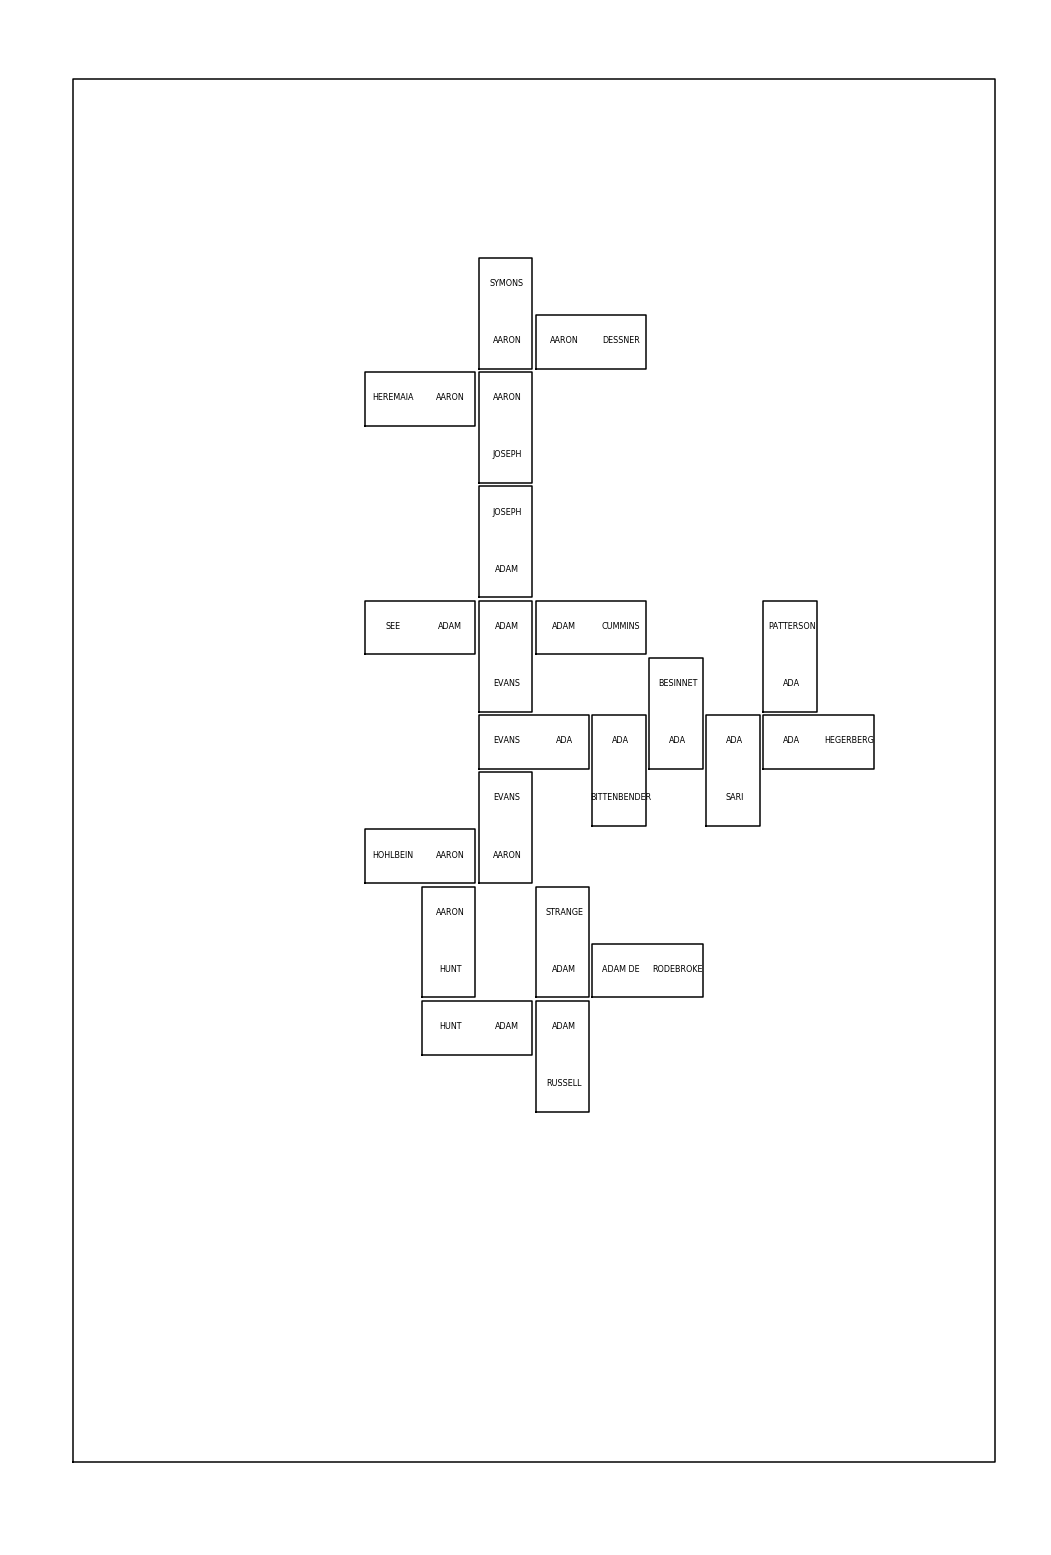

In [20]:
def best(boards): return max(boards, key=lambda board: len(board.boxes))

plot_board(best(dominoes(text_tiles) for _ in range(100)))